# imports

In [2]:
# imports
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint, solve_ivp, solve_bvp
from scipy.optimize import minimize
import pandas as pd
import scipy.linalga as la

# setup the print and display options to make displaying easier
np.set_printoptions(precision=5, suppress=True)
pd.set_option("display.precision", 15)
np.set_printoptions(formatter={'float': lambda x: "{0:0.7f}".format(x)})
pd.set_option('display.float_format', lambda x: "{0:0.7f}".format(x))
pd.set_option('display.max_columns', None)

# base model

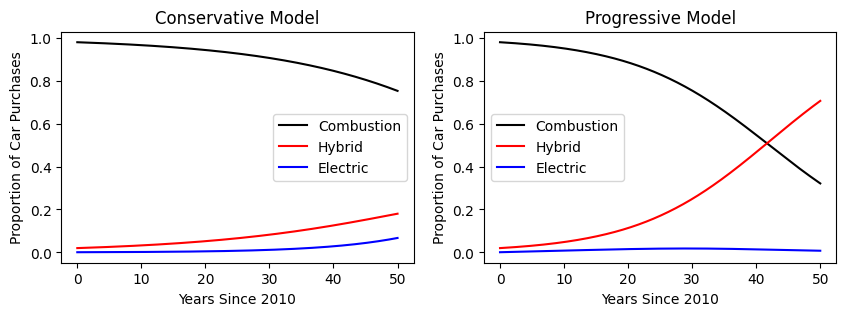

In [4]:
# build model
def model(t, cars, ch, he, ec, hc, eh, ce, c, h, e):
    return np.array([(hc-ch)*cars[0]*cars[1] + (ec-ce)*cars[0]*cars[2] + c,
                     (ch-hc)*cars[0]*cars[1] + (eh-he)*cars[1]*cars[2] + h,
                     (ce-ec)*cars[0]*cars[2] + (he-eh)*cars[1]*cars[2] + e])

# constants for a more conservative model
ch = 0.15 # rate from combustion to hybrid
he = 0.1 # rate from hybrid to electric
ec = 0.01 # rate from electric to combustion
hc = 0.1 # rate from hybrid to combustion
eh = 0.01 # rate from electric to hybrid
ce = 0.1 # rate from combustion to electric
c = 0.0 # rate of new combustion
h = 0.0 # rate of new hybrid
e = 0.0 # rate of new electric

# initial conditions
C = 0.9792
H = 0.02
E = 0.0008

# time points
t0 = 0
tf = 50

# solve ODE
sol = solve_ivp(model, [t0, tf], [C, H, E], args=(ch, he, ec, hc, eh, ce, c, h, e), t_eval=np.linspace(t0, tf, 1000))

# constants for a more progressive model
ch = 0.19 # rate from combustion to hybrid
he = 0.2 # rate from hybrid to electric
ec = 0.080 # rate from electric to combustion
hc = 0.1 # rate from hybrid to combustion
eh = 0.43 # rate from electric to hybrid
ce = 0.1 # rate from combustion to electric
c = 0.0 # rate of new combustion
h = 0.0 # rate of new hybrid
e = 0.0007 # rate of new electric

sol2 = solve_ivp(model, [t0, tf], [C, H, E], args=(ch, he, ec, hc, eh, ce, c, h, e), t_eval=np.linspace(t0, tf, 1000))

# plot
plt.figure(figsize=(10, 3))
plt.subplot(121)
plt.plot(sol.t, sol.y[0], label="Combustion", c="k")
plt.plot(sol.t, sol.y[1], label="Hybrid", c="r")
plt.plot(sol.t, sol.y[2], label="Electric", c="b")
plt.title("Conservative Model")
plt.xlabel("Years Since 2010")
plt.ylabel("Proportion of Car Purchases")
plt.legend()

plt.subplot(122)
plt.plot(sol2.t, sol2.y[0], label="Combustion", c="k")
plt.plot(sol2.t, sol2.y[1], label="Hybrid", c="r")
plt.plot(sol2.t, sol2.y[2], label="Electric", c="b")
plt.title("Progressive Model")
plt.xlabel("Years Since 2010")
plt.ylabel("Proportion of Car Purchases")
plt.legend()
plt.show()

# charging ports

### setup the data

In [ ]:
# load the charging data
charging_df = pd.read_csv("data/charging.csv")

# load the sales data
sales_df = pd.read_csv("data/vehicle_sales_2000_2023.csv")
sales_df = sales_df.merge(charging_df, on='Year', how='left')
sales_df['Charging Ports'] = sales_df['Charging Ports'].fillna(0).astype(float) / 1000
sales_df['Station Locations'] = sales_df['Station Locations'].fillna(0).astype(float) / 1000
sales_df['Station Locations Ratio'] = sales_df['Station Locations'] / sales_df['Total']

rel_sales_df = sales_df.loc[sales_df['Year'] >= 2011, :].copy()